In [1736]:
#!/usr/bin/python3 (3.8.10 x64)
import numpy as np
import pygad
import os
import mazes

Create a function that reads the 2D representation of a maze and returns the shortest path found by a genetic algorithm.

In [1737]:
# Convert mazes into 2D array of chars
def get_maze(maze):
    res = []
    for i in range(len(maze)):
        row = list(list(maze[i])[0])
        res.append(row)
        
    return np.array(res)

In [1738]:
# Convert mazes
maze1 = get_maze(mazes.maze1)
maze2 = get_maze(mazes.maze2)
maze3 = get_maze(mazes.maze3)
maze4 = get_maze(mazes.maze4)
maze5 = get_maze(mazes.maze5)
maze6 = get_maze(mazes.maze6)
maze7 = get_maze(mazes.maze7)
maze3_T = get_maze(mazes.maze3_T) 
maze4_T = get_maze(mazes.maze4_T) 
maze5_T = get_maze(mazes.maze5_T) 
maze7_T = get_maze(mazes.maze7_T) 

In [1739]:
# Return a tuple containing indices of start
def find_start(maze):
    '''
        Return an array containing indices of start
    '''
    maze = np.array(maze)
    for i in range(maze.shape[0]):
        for j in range(maze.shape[1]):
            if maze[i,j] == "S":
                return i,j

In [1740]:
# Return a tuple containing indices of end
def find_end(maze):
    '''
    Return an array containing indices of end
    '''
    maze = np.array(maze)
    for i in range(maze.shape[0]):
        for j in range(maze.shape[1]):
            if maze[i,j] == "E":
                return i,j

Solution will be encoded as follows:
* It will be a vector of values (np array)
* Each value will span from 0 to 3
* Each value corresponds to a direction 
* * 0 - up
* * 1 - down
* * 2 - left
* * 3 - right

Maze: `h x w` matrix, possible values of maze[i,j]:
* `#` - wall
* `.` - valid field
* `S` - starting field
* `E` - ending field

Maze[i,j] gives:
*   (0) up = Maze[i-1, j]
*   (1) down = Maze[i+1, j]
*   (2) left = Maze[i, j-1]
*   (3) right = Maze[i, j+1]

In [1741]:
solutions = [False]
def set_solutions_false():
    solutions[0] = False
    
def shortest_path(maze, i, j, visited):
    if [i,j] in visited:
        return 0
    
    path_len = 0
    visited.append([i,j])
        
    if maze[i,j] == "E":
        solutions[0] = True;
        return 0
    
    if i > 0 and maze[i-1, j] != "#":
        path_len = shortest_path(maze, i-1, j, visited) + 1
        if solutions[0]:
            maze[i,j] = "0"
            return path_len
    
    if j > 0 and maze[i, j-1] != "#":
        path_len = shortest_path(maze, i, j-1, visited) + 1
        if solutions[0]:
            maze[i,j] = "0"
            return path_len
        
    if i < maze.shape[0]-1 and maze[i+1, j] != "#":
        path_len = shortest_path(maze, i+1, j, visited) + 1
        if solutions[0]:
            maze[i,j] = "0"
            return path_len
         
    
    if j < maze.shape[1]-1 and maze[i, j+1] != "#":
        path_len = shortest_path(maze, i, j+1, visited) + 1
        if solutions[0]:
            maze[i,j] = "0"
            return path_len    
        
    visited.remove([i,j])

    solutions[0] = False
    return path_len

solutions = [False]

In [1742]:
def get_shortest_path(maze):
    set_solutions_false()
    start = find_start(maze)
    m = maze.copy()
    res = shortest_path(m, start[0], start[1], [])
    return res, m
    

In [1743]:
# Choose which maze to solve
maze = maze7


In [1744]:
maze

array([['#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#',
        '#', '#', '#', '#', '#', '#', '#'],
       ['#', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.',
        '.', '.', '.', '.', '.', '.', '#'],
       ['#', '.', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#',
        '#', '#', '#', '.', '#', '#', '#'],
       ['#', '.', '#', '#', '#', '#', '#', '#', '#', '#', '.', '.', '.',
        '.', '.', '.', '.', '#', '#', '#'],
       ['#', '.', '#', '.', '.', '.', '.', '.', '.', '.', '.', '#', '#',
        '#', '#', '#', '#', '.', '.', '#'],
       ['#', '.', '#', '#', '.', '#', '#', '.', '#', '#', '.', '.', '.',
        '.', '.', '.', '.', '.', '#', '#'],
       ['#', '.', '#', '.', '.', '.', '#', '.', '#', '#', '.', '#', '#',
        '#', '#', '#', '#', '.', '#', '#'],
       ['#', '.', '#', '#', '#', '.', '#', '.', '#', '#', '.', '.', '.',
        '.', '.', '#', '#', '.', '#', '#'],
       ['#', '.', '#', '#', '#', '.', '.', '#', '#', '#', '#', '

In [1745]:
import time as time

In [1746]:
path_len, _ = get_shortest_path(maze)
y, x = find_start(maze)

end = find_end(maze)

def fitness(solution, solution_index):
    '''
        Takes in a maze and a solution and solution_index
        Returns a scalar score
    '''
    score = 0
    seen = []

    i, j = y, x

    
    for move in solution:

        # Determine new position
        if move == 0:
            i -= 1
        elif move == 1:
            i += 1
        elif move == 2:
            j -= 1
        elif move == 3:
            j += 1     

 
        # Out of bounds
        if i < 0 or j < 0 or i > len(maze[0])-1 or j > len(maze[1])-1:
            return -score



        if maze[i, j] == ".":
            score += 2;        
        #if i < 0:
        #    i = 0
        #elif i > len(maze)-1:
        #    i = len(maze)-1

        #if j < 0:
        #    j = 0
        #elif j > len(maze[0])-1:
        #    j = len(maze[0])-1
        #elif position in seen:
        #    score -= len(seen);
            #break;

        # Finish
        if maze[i, j] == "E":
            
            print("SOLUTION")
            score +=  990
            return score
        
            #seen.append(position)
            #break
        #try: 
        #    m[i,j] = "X"
        #    print("move:", move, "score:", score, "\n\n", m)
        #    time.sleep(3)
        #except IndexError:
        #    print("out of bounds")
            
        # Reward staying on path 

        #    pass
            #score += 15 * (path_len - ix)
        
        # Penalize wall and path length
        if maze[i, j] == "#":
            #print(f"wall:  {score_}")
            score -= 10  # (path_len - ix)**2
            #print(f"new score_ {score_}")
            seen.append((i,j))
            #return score
            #seen.append(position)
    
    return score


In [1747]:
num_generations = 1000
num_parents_mating = 100

solutions_per_pop = 100

num_genes =  maze.shape[0]* 10
num_genes, dfs_solution = get_shortest_path(maze)
print(num_genes)

init_range_low = 0
init_range_high = 4

parent_selection_type = "sss"
keep_parents = 50

crossover_type = "single_point"
crossover_probability = 0.1

mutation_type = "swap"
mutation_probability = 0.1
mutation_percent_genes = 0.1

99


In [1748]:
def callback_gen(ga_instance):
    print("Generation : ", ga_instance.generations_completed)
    print("Fitness of the best solution :", ga_instance.best_solution()[1])

In [1749]:
unique_vals = []
def on_crossover(ga_instance, children):
    print(ga_instance.generations_completed, children)
    unique_vals.append(children[0][0])
    
first_child = []
def on_mutation(ga_instance, children):
    first_child.append(children[0])

In [1750]:
ga_instance = pygad.GA(num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness,
                        sol_per_pop=solutions_per_pop,
                        num_genes=num_genes,
                        gene_type=int,
                        parent_selection_type=parent_selection_type,
                        crossover_type=crossover_type,
                        #crossover_probability=crossover_probability,
                        mutation_type=mutation_type,
                        #keep_elitism=solutions_per_pop//2,
                        #random_mutation_min_val=0,
                        #random_mutation_max_val=3,
                        #mutation_by_replacement=True,
                        #suppress_warnings=True,
                        gene_space=[0,1,2,3],
                        #mutation_percent_genes=mutation_percent_genes,
                        #mutation_probability=mutation_probability,
                        on_generation=callback_gen,
                        random_seed=420,
                        #on_crossover=on_crossover
                        )

In [1751]:
def visualize(maze, solution):
    m = maze.copy()
    i, j = find_start(maze)
    sol = []
    solved = False
    for step in solution:
        try:
     
            if step == 0:
                sol.append("U")
                i -= 1
            elif step == 1:
                sol.append("D")
                i += 1
            elif step == 2:
                sol.append("L")
                j -= 1
            elif step == 3:
                sol.append("R")
                j += 1
                
                
            if m[i,j] == "E":
                solved = True
                m[i,j] = "X"
            if (i > -1 and j > -1 and solved == False):
                m[i, j] = "O" 
        except Exception as e: #IndexError:
            pass
            #print(f"Exception: {e}")
            
    return m, sol


In [1752]:
ga_instance.run()

SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
Generation :  1
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
Fitness of the best solution : 982
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
Generation :  2
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
Fitness of the best solution : 98

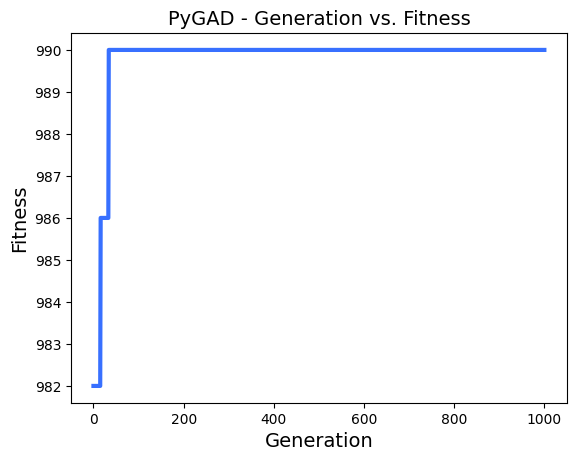

SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
SOLUTION
Parameters of the best solution : [1 1 2 2 3 3 1 0 1 3 1 2 1 2 0 1 0 0 1 2 3 3 1 1 1 0 0 1 3 0 1 0 1 1 2 2 3
 3 2 1 1 2 1 3 3 1 1 3 0 1 1 2 2 3 3 1 0 1 3 1 2 1 2 0 1 0 0 1 2 3 3 1 1 1
 0 0 1 3 0 1 0 1 1 2 2 3 3 3 2 1 2 1 3 3 1 1 3 0 0] index =  0
Fitness value of the best solution = 990


In [1753]:
ga_instance.plot_fitness()
ga_instance.save("maze2-solved-2")

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution), "index = ", solution_idx)
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
#print(unique_vals)
#prediction = np.sum(np.array(ins)*solution)
#print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

In [1754]:
m, sol = visualize(maze, solution)

print("fitness: ", fitness([0, 1, 0, 3, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 3, 0, 1, 3, 3, 2, 2, 1, 2, 0, 3, 0, 0, 0, 0, 2, 0, 2, 1, 2, 0, 2, 3
, 3, 1, 0, 1, 0, 2, 2, 3, 0, 0, 2, 1, 3], 0))
_, dfs_solution = get_shortest_path(maze)
print("solution", sol)
print("GA\n", m, len(solution), "\n")
print("DFS\n", dfs_solution)

fitness:  40
solution ['D', 'D', 'L', 'L', 'R', 'R', 'D', 'U', 'D', 'R', 'D', 'L', 'D', 'L', 'U', 'D', 'U', 'U', 'D', 'L', 'R', 'R', 'D', 'D', 'D', 'U', 'U', 'D', 'R', 'U', 'D', 'U', 'D', 'D', 'L', 'L', 'R', 'R', 'L', 'D', 'D', 'L', 'D', 'R', 'R', 'D', 'D', 'R', 'U', 'D', 'D', 'L', 'L', 'R', 'R', 'D', 'U', 'D', 'R', 'D', 'L', 'D', 'L', 'U', 'D', 'U', 'U', 'D', 'L', 'R', 'R', 'D', 'D', 'D', 'U', 'U', 'D', 'R', 'U', 'D', 'U', 'D', 'D', 'L', 'L', 'R', 'R', 'R', 'L', 'D', 'L', 'D', 'R', 'R', 'D', 'D', 'R', 'U', 'U']
GA
 [['#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#'
  '#' '#']
 ['#' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.'
  '.' '#']
 ['#' '.' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '.' '#'
  '#' '#']
 ['#' '.' '#' '#' '#' '#' '#' '#' '#' '#' '.' '.' '.' '.' '.' '.' '.' '#'
  '#' '#']
 ['#' '.' '#' '.' '.' '.' '.' '.' '.' '.' '.' '#' '#' '#' '#' '#' '#' '.'
  '.' '#']
 ['#' '.' '#' '#' '.' '#' '#' '.' '#' '#' '.' '.' '.'

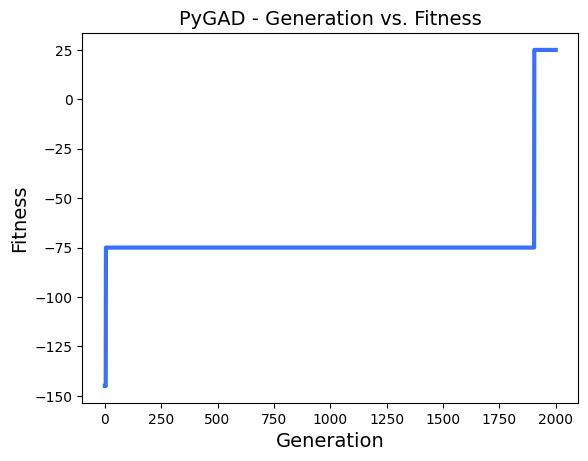

SOLUTION
SOLUTION
SOLUTION
SOLUTION
(array([1, 1, 1, 3, 0, 0, 3, 1, 3, 1]), 982, 67)


In [1755]:
loaded = pygad.load("maze2-solved")
loaded.plot_fitness()
print(loaded.best_solution())

In [1756]:
print(fitness([1, 1, 0, 2, 3, 2, 2, 0, 2, 0, 3, 3, 3, 3, 3, 0,2 ,3, 1, 2, 2, 0, 2, 1, 2], 0))
m, sol = visualize(maze, [1, 1, 0, 2, 3, 2, 2, 0, 2, 0, 3, 3, 3, 3, 3, 0,2 ,3, 1, 2, 2, 0, 2, 1, 2])
print(maze, "\n\n", m, sol)

-106
[['#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#'
  '#' '#']
 ['#' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.'
  '.' '#']
 ['#' '.' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '.' '#'
  '#' '#']
 ['#' '.' '#' '#' '#' '#' '#' '#' '#' '#' '.' '.' '.' '.' '.' '.' '.' '#'
  '#' '#']
 ['#' '.' '#' '.' '.' '.' '.' '.' '.' '.' '.' '#' '#' '#' '#' '#' '#' '.'
  '.' '#']
 ['#' '.' '#' '#' '.' '#' '#' '.' '#' '#' '.' '.' '.' '.' '.' '.' '.' '.'
  '#' '#']
 ['#' '.' '#' '.' '.' '.' '#' '.' '#' '#' '.' '#' '#' '#' '#' '#' '#' '.'
  '#' '#']
 ['#' '.' '#' '#' '#' '.' '#' '.' '#' '#' '.' '.' '.' '.' '.' '#' '#' '.'
  '#' '#']
 ['#' '.' '#' '#' '#' '.' '.' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '.'
  '#' '#']
 ['#' '.' '#' '#' '#' '#' '.' '#' '#' '#' '.' '.' '.' '.' '.' '.' '.' '.'
  '.' '#']
 ['#' '.' '#' '.' '.' '.' '.' '#' '.' '.' '.' '#' '#' '#' '#' '.' '#' '#'
  '#' '#']
 ['#' '.' '#' '.' '#' '#' '#' '#' '.' '#' '#' '#' '#' '.' '.